<a href="https://colab.research.google.com/github/Anjaneyakumar18/DATA-SCIENCE-PYTHON/blob/main/6.Machine%20Learning/Multiple_Linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Data_sets/Student_Performance.csv")

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [26]:
df["Extracurricular Activities"]=df["Extracurricular Activities"].replace({
    "Yes":1,
    "No":0
})

<ipython-input-26-603a04719273>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Extracurricular Activities"]=df["Extracurricular Activities"].replace({


In [23]:
x=df.columns[:-1]
y=df.columns[-1]

In [24]:
print(x,y)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object') Performance Index


In [40]:
for col in x:
    covariance_value = np.cov(df[col], df[y])[0,1]
    print(f"Covariance of {col} and {y} is {covariance_value}")

Covariance of Hours Studied and Performance Index is 18.592055285528556
Covariance of Previous Scores and Performance Index is 304.9468013201321
Covariance of Extracurricular Activities and Performance Index is 0.23559251925192498
Covariance of Sleep Hours and Performance Index is 1.5673778577857769
Covariance of Sample Question Papers Practiced and Performance Index is 2.3836125212521253


In [52]:
corelation_lst=[]
for col in x:
  correlation_value = np.corrcoef(df[col], df[y])[0,1]
  corelation_lst.append(correlation_value)
  print(f"Correlation of {col} and {y} is {correlation_value}")

Correlation of Hours Studied and Performance Index is 0.3737303506987236
Correlation of Previous Scores and Performance Index is 0.9151891412264476
Correlation of Extracurricular Activities and Performance Index is 0.024524946967550528
Correlation of Sleep Hours and Performance Index is 0.04810583543435253
Correlation of Sample Question Papers Practiced and Performance Index is 0.04326832665907977


In [ ]:
#Previous scores and target feature are highly related

In [27]:
model = LinearRegression()
model.fit(df[x], df[y])

LinearRegression()

In [48]:
prediction=model.predict([[11, 96, 0, 8, 5]])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
print(f'Student performance is {prediction}')

Student performance is [99.8903857]


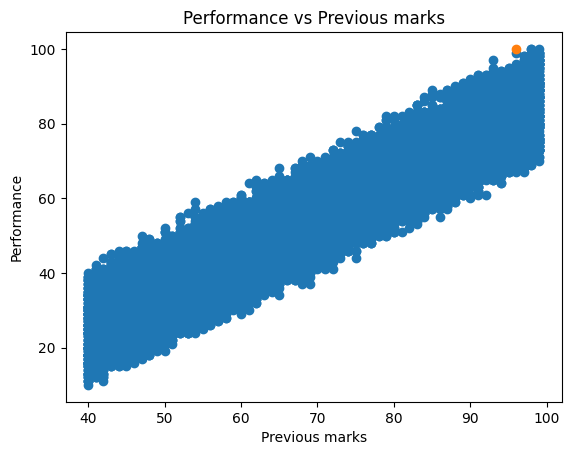

In [51]:
plt.scatter(df[x[1]],df[y])

plt.scatter([96],[prediction])
plt.xlabel("Previous marks")
plt.ylabel("Performance")
plt.title("Performance vs Previous marks")
plt.show()

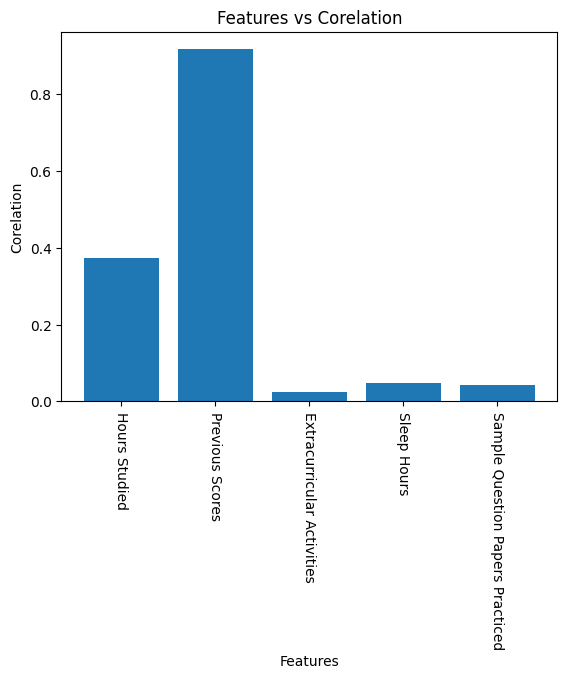

In [61]:
plt.bar(x,corelation_lst)
plt.xlabel("Features")
plt.ylabel("Corelation")
plt.title("Features vs Corelation")
plt.xticks(rotation=270)

plt.show()